In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import tree
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
from catboost.datasets import titanic
titanic_train, titanic_test = titanic()
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Check for **Null** values.

In [5]:
titanic_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Plot Features that have Nulls to decide which stratgy do we use

### Age

In [6]:
titanic_train.Age.nunique()

88

c:\System\Downloads\Anaconda\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Count'>

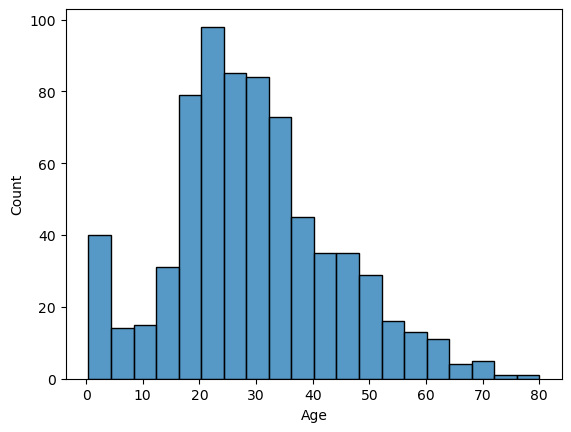

In [7]:
sns.histplot(titanic_train.Age)

### Fill Null values

In [8]:
# Train
titanic_train.Age[titanic_train.Age.isna()] = titanic_train.Age.mean()
print(titanic_train.Age.isna().sum())

0


C:\Users\DELL\AppData\Local\Temp\ipykernel_21016\508161829.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_train.Age[titanic_train.Age.isna()] = titanic_train.Age.mean()


In [9]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Cabin

In [10]:
titanicdata=titanic_train.drop(['Cabin'],axis=1)

### Embarked

In [11]:
titanicdata.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

c:\System\Downloads\Anaconda\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Embarked', ylabel='Count'>

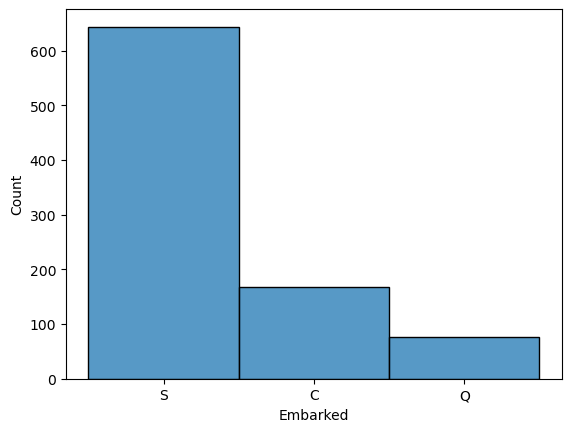

In [12]:
sns.histplot(titanicdata.Embarked)

In [13]:
titanicdata.Embarked.mode()

0    S
Name: Embarked, dtype: object

### Fill Null values

In [14]:

titanicdata.Embarked[titanicdata.Embarked.isna()] = titanicdata.Embarked.mode()[0]
# print(titanicdata.Embarked.isna().sum())
titanicdata.Embarked.isna().sum()


C:\Users\DELL\AppData\Local\Temp\ipykernel_21016\1543733804.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanicdata.Embarked[titanicdata.Embarked.isna()] = titanicdata.Embarked.mode()[0]


0

### Remove Features that is useless

In [15]:
titanicdata = titanicdata.drop(['PassengerId','Name','Ticket'],axis=1)


In [16]:
titanicdata

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


In [17]:
titanicdata.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

### Apply One-Hot-Encoding to Categorical Features

In [21]:
#use get dummies instead
encoded_data=pd.get_dummies(titanicdata,columns=['Sex','Embarked'])


In [22]:
encoded_data

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.000000,1,0,7.2500,False,True,False,False,True
1,1,1,38.000000,1,0,71.2833,True,False,True,False,False
2,1,3,26.000000,0,0,7.9250,True,False,False,False,True
3,1,1,35.000000,1,0,53.1000,True,False,False,False,True
4,0,3,35.000000,0,0,8.0500,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,False,True,False,False,True
887,1,1,19.000000,0,0,30.0000,True,False,False,False,True
888,0,3,29.699118,1,2,23.4500,True,False,False,False,True
889,1,1,26.000000,0,0,30.0000,False,True,True,False,False


### Split Data into X,Y

In [23]:
# Train
X = encoded_data.drop('Survived',axis=1)
Y = encoded_data['Survived']

### Split Train Data into Train and Test sets

In [28]:
Xtrain, Xtest, Ytrain, Ytest= train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=42)

In [25]:
Xtrain.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
692,3,29.699118,0,0,56.4958,False,True,False,False,True
481,2,29.699118,0,0,0.0000,False,True,False,False,True
527,1,29.699118,0,0,221.7792,False,True,False,False,True
855,3,18.000000,0,1,9.3500,True,False,False,False,True
801,2,31.000000,1,1,26.2500,True,False,False,False,True


In [26]:
Ytrain.head()

692    1
481    0
527    0
855    1
801    1
Name: Survived, dtype: int64

In [29]:
Xtest.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
565,3,24.000000,2,0,24.1500,False,True,False,False,True
160,3,44.000000,0,1,16.1000,False,True,False,False,True
553,3,22.000000,0,0,7.2250,False,True,True,False,False
860,3,41.000000,2,0,14.1083,False,True,False,False,True
241,3,29.699118,1,0,15.5000,True,False,False,True,False


In [30]:
Ytest.head()

565    0
160    0
553    1
860    0
241    1
Name: Survived, dtype: int64